Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy for k=1: 0.7240584166026134
Accuracy for k=2: 0.7240584166026134
Accuracy for k=3: 0.7524980784012298
Accuracy for k=4: 0.754803996925442
Accuracy for k=5: 0.7617217524980784
Accuracy for k=6: 0.760184473481937
Accuracy for k=7: 0.765564950038432
Accuracy for k=8: 0.7563412759415834
Accuracy for k=9: 0.7724827056110684
Accuracy for k=10: 0.760184473481937
Accuracy for k=11: 0.7732513451191392
Accuracy for k=12: 0.7647963105303612
Accuracy for k=13: 0.7747886241352806
Accuracy for k=14: 0.7732513451191392
Accuracy for k=15: 0.7770945426594927
Accuracy for k=16: 0.781706379707917
Accuracy for k=17: 0.7794004611837049
Accuracy for k=18: 0.7801691006917756
Accuracy for k=19: 0.7840122982321291
Accuracy for k=20: 0.7794004611837049


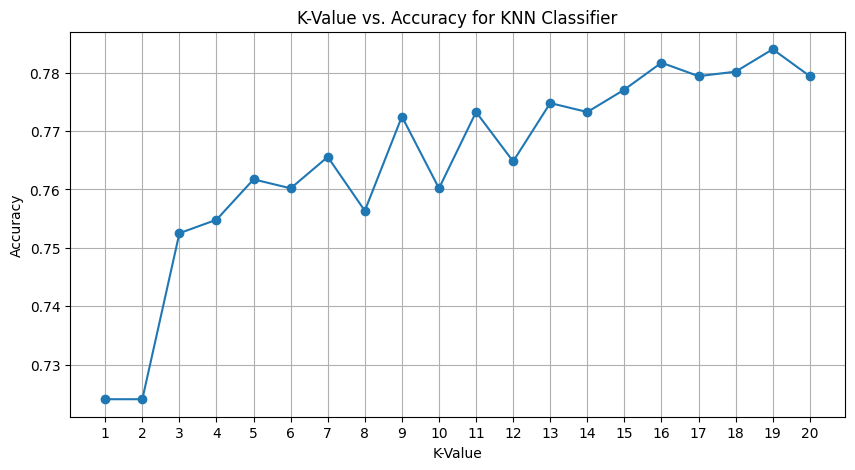

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to your dataset
base_path = '/content/drive/MyDrive/Data_Project/'

def load_images(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path)
                data.append((img, label))
            except IOError:
                print(f"Cannot open image: {img_path}")
    return data

def to_grayscale(img):
    return img.convert('L')

def edge_detection(img):
    return img.filter(ImageFilter.FIND_EDGES)

def color_histogram(img):
    return img.histogram()

def normalize(features):
    return features / np.linalg.norm(features)

def pca(X, num_components):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

class KNearestNeighbors:
    def __init__(self, k=22):
        self.k = k

    def fit(self, features, labels):
        self.train_features = features
        self.train_labels = labels

    def predict(self, features):
        predictions = []
        for point in features:
            distances = [np.sqrt(np.sum((point - other) ** 2)) for other in self.train_features]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.train_labels[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

def find_best_k(train_features, train_labels, test_features, test_labels, max_k):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNearestNeighbors(k=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        accuracy = np.mean(predictions == test_labels)
        accuracies.append(accuracy)
        print(f'Accuracy for k={k}: {accuracy}')
    return range(1, max_k + 1), accuracies

train_autos = load_images(base_path + 'Cars Dataset/train', label=0)
train_motorcycles = load_images(base_path + 'Motorcycle Dataset/train/motorbike', label=1)
test_autos = load_images(base_path + 'Cars Dataset/test', label=0)
test_motorcycles = load_images(base_path + 'Motorcycle Dataset/test/motorbike', label=1)

train_data = train_autos + train_motorcycles
test_data = test_autos + test_motorcycles

train_images, train_labels = zip(*train_data)
train_images = [to_grayscale(img) for img in train_images]
train_edges = [edge_detection(img) for img in train_images]
train_histograms = [color_histogram(img) for img in train_images]
train_features = np.array([normalize(hist) for hist in train_histograms])
train_features = pca(train_features, 20)

test_images, test_labels = zip(*test_data)
test_images = [to_grayscale(img) for img in test_images]
test_edges = [edge_detection(img) for img in test_images]
test_histograms = [color_histogram(img) for img in test_images]
test_features = np.array([normalize(hist) for hist in test_histograms])
test_features = pca(test_features, 20)

max_k = 20
k_range, accuracies = find_best_k(train_features, train_labels, test_features, test_labels, max_k)

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title('K-Value vs. Accuracy for KNN Classifier')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [4]:
knn = KNearestNeighbors()
knn.fit(train_features, train_labels)
predictions = knn.predict(test_features)
# Display confusion matrix
def confusion_matrix(true_labels, pred_labels, classes):
    matrix = np.zeros((classes, classes), int)
    for true, pred in zip(true_labels, pred_labels):
        matrix[true][pred] += 1
    return matrix

cm = confusion_matrix(test_labels, predictions, len(np.unique(train_labels)))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[466 129]
 [147 559]]


Accuracy for k=20: 0.7794004611837049
Accuracy for k=21: 0.7809377401998463
Accuracy for k=22: 0.7878554957724827
Accuracy for k=23: 0.7855495772482706
Accuracy for k=24: 0.7809377401998463
Accuracy for k=25: 0.7801691006917756
Accuracy for k=26: 0.7801691006917756
Accuracy for k=27: 0.7770945426594927
Accuracy for k=28: 0.7717140661029976
Accuracy for k=29: 0.7709454265949269
Accuracy for k=30: 0.7717140661029976
Accuracy for k=31: 0.7640276710222905
Accuracy for k=32: 0.7671022290545734
Accuracy for k=33: 0.7617217524980784
Accuracy for k=34: 0.7632590315142198
Accuracy for k=35: 0.7617217524980784
Accuracy for k=36: 0.765564950038432
Accuracy for k=37: 0.760184473481937
Accuracy for k=38: 0.7617217524980784
Accuracy for k=39: 0.7617217524980784
Accuracy for k=40: 0.7617217524980784


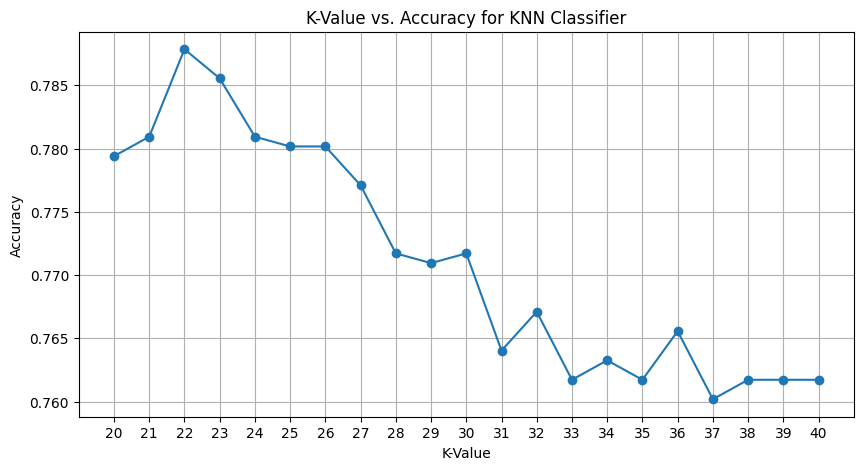

In [5]:
def find_best_k(train_features, train_labels, test_features, test_labels, max_k):
    accuracies = []
    for k in range(20, max_k + 1):
        knn = KNearestNeighbors(k=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        accuracy = np.mean(predictions == test_labels)
        accuracies.append(accuracy)
        print(f'Accuracy for k={k}: {accuracy}')
    return range(20, max_k + 1), accuracies


max_k = 40
k_range, accuracies = find_best_k(train_features, train_labels, test_features, test_labels, max_k)

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title('K-Value vs. Accuracy for KNN Classifier')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.xticks(range(20, max_k + 1))
plt.grid(True)
plt.show()

Accuracy for k=40: 0.7617217524980784
Accuracy for k=41: 0.7640276710222905
Accuracy for k=42: 0.7609531129900077
Accuracy for k=43: 0.7632590315142198
Accuracy for k=44: 0.7609531129900077
Accuracy for k=45: 0.7647963105303612
Accuracy for k=46: 0.7624903920061491
Accuracy for k=47: 0.760184473481937
Accuracy for k=48: 0.7624903920061491
Accuracy for k=49: 0.7609531129900077
Accuracy for k=50: 0.7609531129900077
Accuracy for k=51: 0.7624903920061491
Accuracy for k=52: 0.7586471944657955
Accuracy for k=53: 0.7586471944657955
Accuracy for k=54: 0.7563412759415834
Accuracy for k=55: 0.7578785549577248
Accuracy for k=56: 0.7555726364335127
Accuracy for k=57: 0.7578785549577248
Accuracy for k=58: 0.7571099154496541
Accuracy for k=59: 0.7594158339738662
Accuracy for k=60: 0.7609531129900077


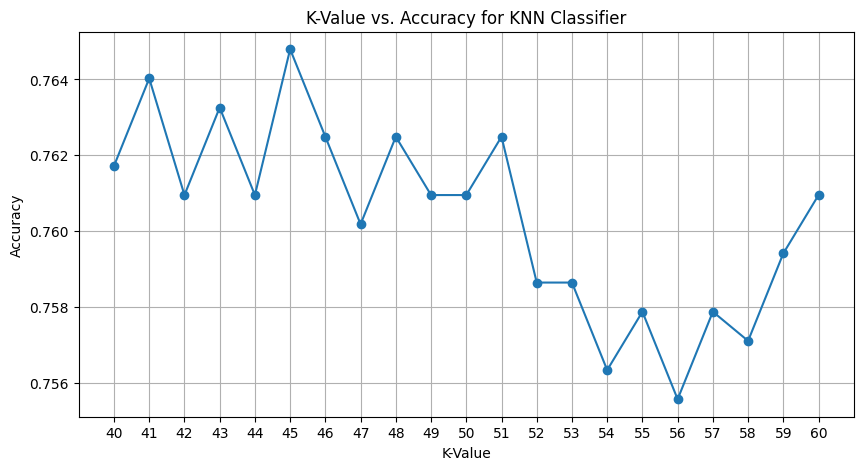

In [6]:
def find_best_k(train_features, train_labels, test_features, test_labels, max_k):
    accuracies = []
    for k in range(40, max_k + 1):
        knn = KNearestNeighbors(k=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        accuracy = np.mean(predictions == test_labels)
        accuracies.append(accuracy)
        print(f'Accuracy for k={k}: {accuracy}')
    return range(40, max_k + 1), accuracies


max_k = 60
k_range, accuracies = find_best_k(train_features, train_labels, test_features, test_labels, max_k)

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title('K-Value vs. Accuracy for KNN Classifier')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.xticks(range(40, max_k + 1))
plt.grid(True)
plt.show()


In [7]:
# Cross-validation function
def cross_validate(features, labels, k_folds=5):
    fold_size = len(features) // k_folds
    indices = np.arange(len(features))
    np.random.shuffle(indices)

    accuracies = []

    for i in range(k_folds):
        # Define train and test indices
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])

        # Split the data
        train_features, test_features = features[train_indices], features[test_indices]
        train_labels, test_labels = labels[train_indices], labels[test_indices]

        # Train the KNN model
        knn = KNearestNeighbors(k=3)  # You can choose your optimal k here
        knn.fit(train_features, train_labels)

        # Test the model
        predictions = knn.predict(test_features)
        accuracy = np.mean(predictions == test_labels)
        accuracies.append(accuracy)

        print(f'Fold {i+1}/{k_folds} Accuracy: {accuracy}')

    average_accuracy = np.mean(accuracies)
    print(f'Average Accuracy: {average_accuracy}')

    return accuracies, average_accuracy

# Run cross-validation
accuracies, average_accuracy = cross_validate(train_features, np.array(train_labels), k_folds=5)


Fold 1/5 Accuracy: 0.7592233009708738
Fold 2/5 Accuracy: 0.7514563106796116
Fold 3/5 Accuracy: 0.7747572815533981
Fold 4/5 Accuracy: 0.7728155339805826
Fold 5/5 Accuracy: 0.7805825242718447
Average Accuracy: 0.767766990291262
